In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

In [24]:
# Change per local-system

fileLoc = 'winemag-data-130k-v2.csv'
data = pd.read_csv(fileLoc, index_col = 0)

In [25]:
# original data has 130k tuples
data[-1:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [38]:
# Before cleaning
print("Before Cleaning")
print("Number of touples:", len(data), "\n")
print(data.nunique(), "\n")
print(data.describe(),"\n")

Before Cleaning
Number of touples: 129971 

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64 

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000 



In [33]:
# Begin to Clean the data
# Remove all touples with null values in following subsets
drop_null_data = data.dropna(subset=['description', 'points', 'price', 'province', 'country', 'winery', 'variety'])


In [28]:
# cleaned data has 120.9k tuples
drop_null_data[-1:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [29]:
# removing duplicate rows gets us to 111.5k tuples
clean_data = drop_null_data.drop_duplicates()

In [32]:
# 111k, clean, unique reviews!
len(clean_data)

111537

In [44]:
# After cleaning
print("After Cleaning")
print("\nNumber of touples:", len(clean_data), "\n")
print(clean_data.nunique())
print(clean_data.describe())

After Cleaning

Number of touples: 111537 

country                      42
description              111511
designation               35753
points                       21
price                       390
province                    422
region_1                   1204
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    110582
variety                     691
winery                    15843
dtype: int64
              points          price
count  111537.000000  111537.000000
mean       88.413809      35.626276
std         3.099243      42.113062
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


In [92]:
countryGroup = clean_data.groupby('country')
countries = [x for x in countryGroup.groups]
countries

['Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Lebanon',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Morocco',
 'New Zealand',
 'Peru',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Switzerland',
 'Turkey',
 'US',
 'Ukraine',
 'Uruguay']

In [ ]:
# i left below relatively untouched

In [ ]:
data_mean = np.mean(clean_data)
data_std = np.std(clean_data)

print(data_mean)

In [ ]:
# Remove outliers in 'price'
# Set max 'price' to $45
# look at https://www.kaggle.com/kabure/wine-review-s-understanding-pythonic-eda as reference



def removeOutliers(data_numeric):
    # Calculate mean and std devition of the the attribute ('price' or 'points')
    upper = 45 # Set the maximum price to $45 for all evaluations (we're broke students after all, feel free to change)
    
    # Find outliers (too expensive)
    outliers_expensive = [x for x in data_numeric if x > upper]
    
    # Remove the outliers
    data_affordable = [x for x in data_numeric if x < upper]
    
    print('Outliers beyond affordable limit: %d', len(data_affordable))
    print('Outliers beyond affordable limit: %d', len(outliers_expensive))
    

In [ ]:
# DON'T RUN, SAME AS ABOVE, NEEDS WORK

removeOutliers(clean_data)

In [ ]:
affordable_wine

In [ ]:
#
# Must rewrite this with dataframe that removes outliers.
#
# 


plt.figure(figsize=(20,18))



plt.subplot(2,1,1)
g = sns.boxplot(x='province', y='price',data=clean_data.province[(clean_data.province.isin(province.index.values))])


In [ ]:
example = clean_data[['description','points']]
example.info()

In [ ]:
# Graphing simple distributions of points
# e.g.


# distribution of 'points'
graph_point_dist = sns.countplot(x='points', data=clean_data)


In [ ]:
#distribution of prices
graph_point_dist = sns.countplot(x='price', data=clean_data)

In [ ]:
# average (mean) price by points
# change to dataframe without expensive outliers
clean_data.groupby(['points']).mean()

In [ ]:
clean_data['province'].value_counts().head(25).plot.pie()

# Unsquish the pie
plt.gca().set_aspect('equal')

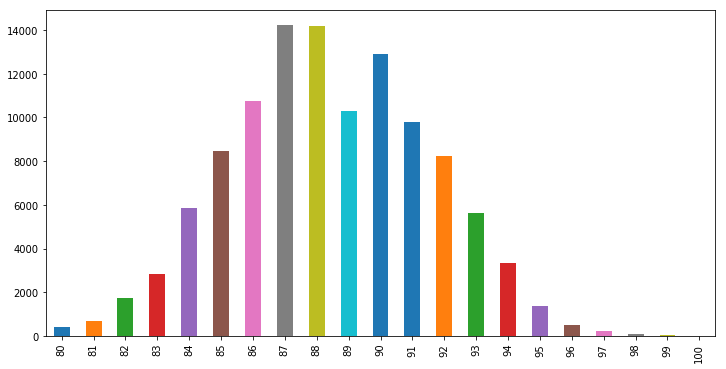

In [91]:
clean_data['points'].value_counts().sort_index().plot.bar(figsize =(12,6))

In [ ]:
clean_data[clean_data['price'] < 100].sample(100).plot.scatter(x='price', y='points')
clean_data[clean_data['price'] < 100].plot.hexbin(x='price', y='points',gridsize = 15)